In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from scipy.optimize import curve_fit
from collections import Counter

In [2]:
plt.rcParams.update({'font.size': 20})
plt.rcParams.update({'lines.linewidth': 2})

## Rule 30 MIPT
use non gaussianity to 
Asites=1, Bsites=120:200, p=0.4:0.001:0.6, n1-n5


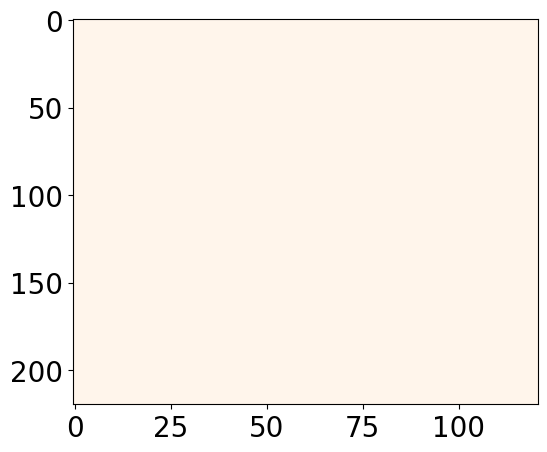

In [32]:
file_idx = 1
# file_name = "../data/240405/240405_n%d_pp.npz"%(file_idx)
# raw = np.load(file_name)
# nmeas_l = raw['y_l']
# nsteps_l = raw['x_l']
# pertb_l = raw['z_l']
# S_ave_arr = raw['data_ave_l']
# S_std_arr = raw['data_std_l']

file_name = "../data/240405/240405_n%d"%(file_idx)
nstep_l = np.loadtxt(file_name+'_0_scanx.csv',skiprows=1)
# nmeas_l = np.loadtxt(file_name+'_0_scany.csv',skiprows=1)
nmeas_l = np.arange(220)
pertb_l = np.loadtxt(file_name+'_0_scanz.csv',skiprows=1)

raw = np.loadtxt(file_name+'_0_data.csv',skiprows=1,delimiter=',')
S_ave_arr = raw.reshape((len(pertb_l),len(nmeas_l),len(nstep_l)))

plt.figure(figsize=(6,5))
plt.imshow(S_ave_arr[0,:,:],aspect="auto",cmap="Oranges")
# for pertb_idx in range(0,50,5):
#     plt.plot(np.arange(2*nsteps_l[-1]), S_ave_arr[pertb_idx,10,:])

In [34]:
np.max(S_ave_arr[:,:,:])

0.01

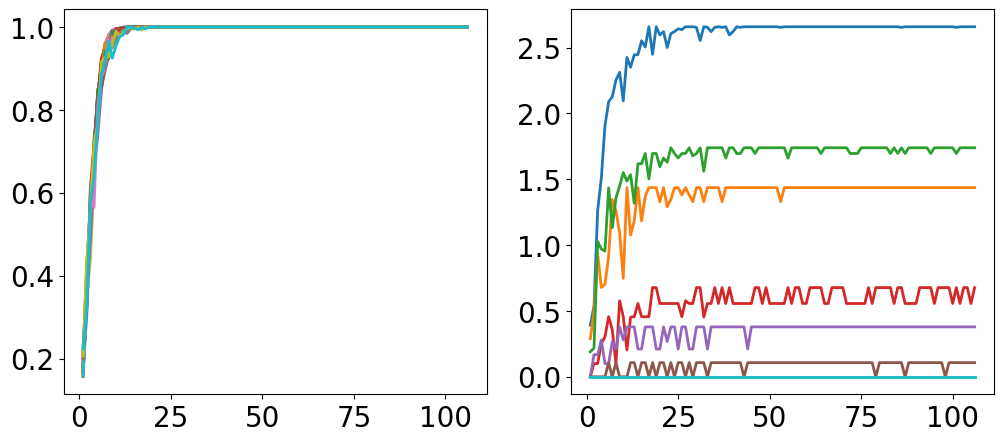

In [13]:
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
for pertb_idx in range(0,30,1):
    plt.plot(nmeas_l, S_ave_arr[pertb_idx,:,-1] / S_ave_arr[pertb_idx,-1,-1])
plt.subplot(1,2,2)
for pertb_idx in range(40,60,1):
    plt.plot(nmeas_l, S_ave_arr[pertb_idx,:,-1])

# plt.xlim([0,25])

#### Rule 30 MIPT fit corr length
Asites=1-4, Bsites=100, p=0:0.01:0.4, 1-4
Asites=1, Bsites=1000, p=0:0.01:0.4, 9

Asites=1, Bsites=1000,500,750,1250,1500, p=0.2:0.001:0.15, 6-10

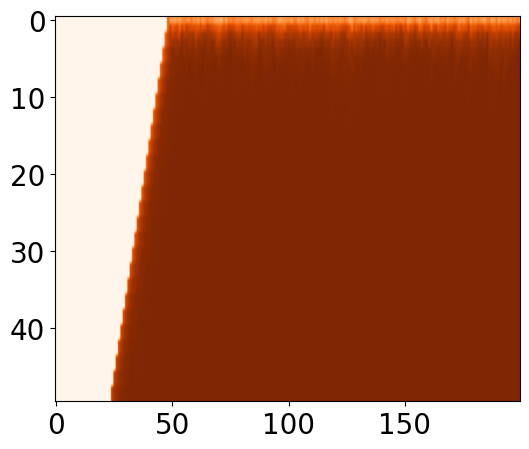

In [70]:
file_idx = 1
file_name = "../data/240405/240405_%d"%(file_idx)
nstep_l = np.loadtxt(file_name+'_scanx.csv',skiprows=1)
nmeas_l = np.loadtxt(file_name+'_scany.csv',skiprows=1)
# nmeas_l = np.arange(220)
pertb_l = np.loadtxt(file_name+'_scanz.csv',skiprows=1)

raw = np.loadtxt(file_name+'_data.csv',skiprows=1,delimiter=',')
S_ave_arr = raw.reshape((len(pertb_l),len(nmeas_l),len(nstep_l)))

plt.figure(figsize=(6,5))
plt.imshow(S_ave_arr[1,:,:],aspect="auto",cmap="Oranges")

(0.0, 10.0)

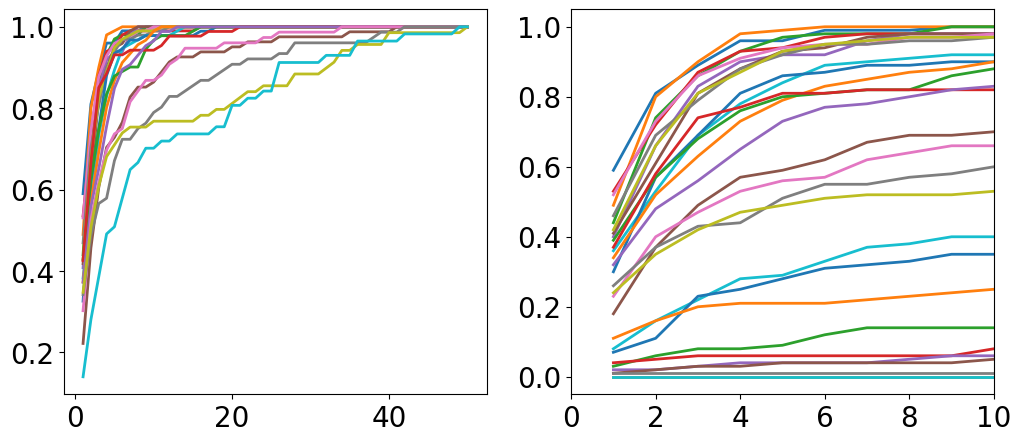

In [68]:
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
for pertb_idx in range(0,20,1):
    plt.plot(nmeas_l, S_ave_arr[pertb_idx,:,-1] / S_ave_arr[pertb_idx,-1,-1])

# plt.xlim([0,10])
plt.subplot(1,2,2)
for pertb_idx in range(0,30,1):
    plt.plot(nmeas_l, S_ave_arr[pertb_idx,:,-1])

plt.xlim([0,10])

nAsites=1, nBsites=1000, step=500, pertb=0:0.5:0.01 8

nAsites=1, nBsites=1000, step=500, pertb=0.2:0.25:0.01 9

(0.0, 100.0)

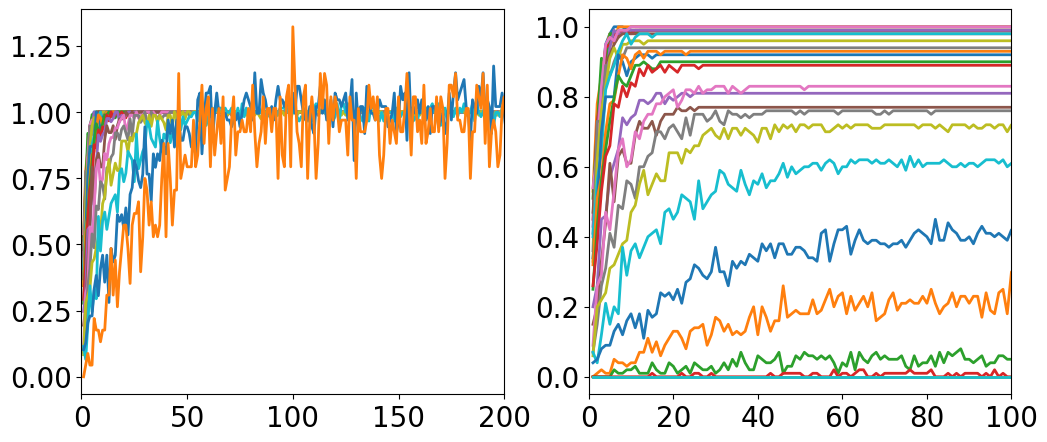

In [518]:
file_idx = 8
file_name = "../data/240405/240405_%d"%(file_idx)
nmeas_l = np.loadtxt(file_name+'_scanx.csv',skiprows=1)
pertb_l = np.loadtxt(file_name+'_scany.csv',skiprows=1)

raw = np.loadtxt(file_name+'_data.csv',skiprows=1,delimiter=',')
S_ave_arr = raw.reshape((len(pertb_l),len(nmeas_l)))

plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
for pertb_idx in range(0,22,1):
    plt.plot(nmeas_l, S_ave_arr[pertb_idx,:] / np.average(S_ave_arr[pertb_idx,-10:]))

plt.xlim([0,200])
plt.subplot(1,2,2)
for pertb_idx in range(0,30,1):
    plt.plot(nmeas_l, S_ave_arr[pertb_idx,:])

plt.xlim([0,100])

In [332]:
len(pertb_l)

126

<ErrorbarContainer object of 3 artists>

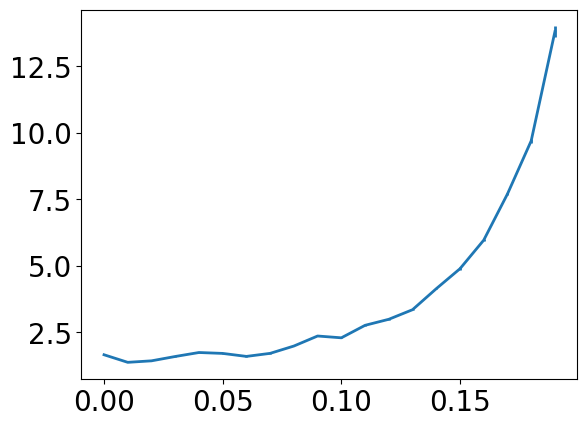

In [249]:
# def fit_exp(x,x0):
#     return 1-np.exp(-x/x0)

# pertb_upper_idx = 24
# meas0_l = np.zeros(pertb_upper_idx)
# meas0_std_l = np.zeros(pertb_upper_idx)
# for pertb_idx in range(0,pertb_upper_idx,1):
#     popt, pcov = curve_fit(fit_exp, nmeas_l, S_ave_arr[pertb_idx,:] / max(S_ave_arr[pertb_idx,:]),p0=(2))
#     meas0_l[pertb_idx] = popt[0]
#     meas0_std_l[pertb_idx] = np.sqrt(pcov[0])

# plt.errorbar(pertb_l[0:pertb_upper_idx],meas0_l,yerr=meas0_std_l)

def fit_exp(x,x0,A):
    return A*(1-np.exp(-x/x0))

pertb_upper_idx = 20
meas0_l = np.zeros(pertb_upper_idx)
meas0_std_l = np.zeros(pertb_upper_idx)
for pertb_idx in range(0,pertb_upper_idx,1):
    popt, pcov = curve_fit(fit_exp, nmeas_l, S_ave_arr[pertb_idx,:],p0=(10,np.average(S_ave_arr[pertb_idx,-10:])))
    meas0_l[pertb_idx] = popt[0]
    meas0_std_l[pertb_idx] = np.sqrt(pcov[0,0])

plt.errorbar(pertb_l[0:pertb_upper_idx],meas0_l,yerr=meas0_std_l)

# plt.xscale('log')
# plt.yscale('log')

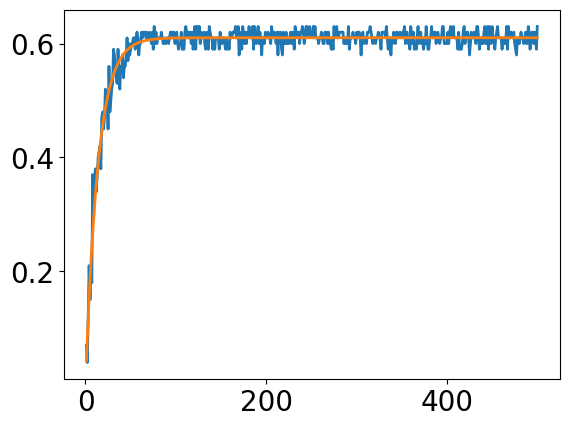

In [250]:
plt.plot(nmeas_l, S_ave_arr[pertb_idx,:])
plt.plot(nmeas_l,fit_exp(nmeas_l,*popt))

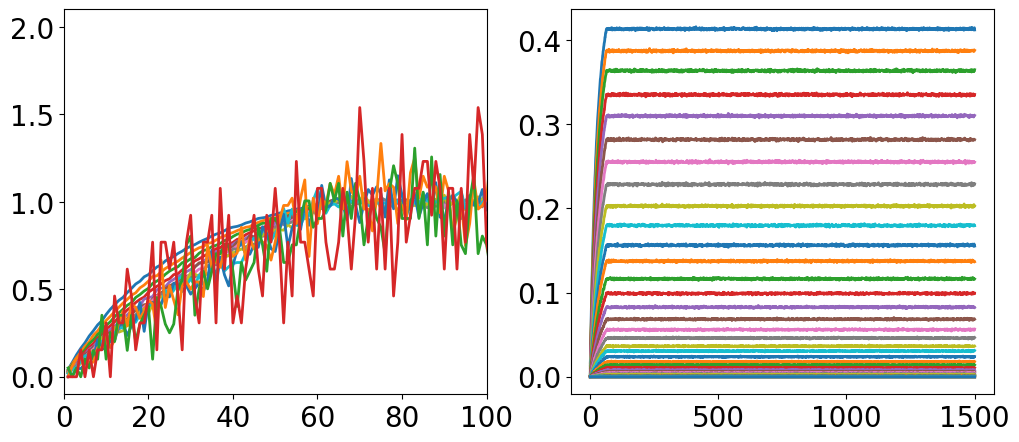

In [403]:
file_idx = 10
file_name = "../data/240405/240405_n%d_pp.npz"%(file_idx)
raw = np.load(file_name)
nmeas_l = raw['x_l']
pertb_l = raw['y_l']
S_ave_arr = raw['data_ave_l'].reshape((len(pertb_l),len(nmeas_l)))

plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
for pertb_idx in range(0,40,3):
    plt.plot(nmeas_l, S_ave_arr[pertb_idx,:] / np.average(S_ave_arr[pertb_idx,-10:]))

plt.xlim([0,100])
plt.subplot(1,2,2)
for pertb_idx in range(0,51,1):
    plt.plot(nmeas_l, S_ave_arr[pertb_idx,:])

# plt.xlim([0,100])

<ErrorbarContainer object of 3 artists>

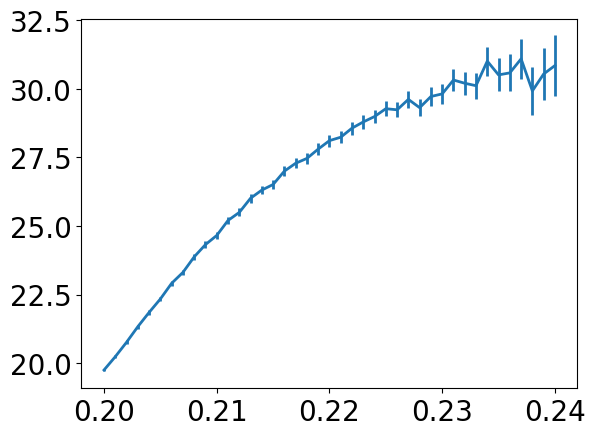

In [261]:
def fit_exp(x,x0,A):
    return A*(1-np.exp(-x/x0))

pertb_upper_idx = 41
meas0_l = np.zeros(pertb_upper_idx)
meas0_std_l = np.zeros(pertb_upper_idx)
for pertb_idx in range(0,pertb_upper_idx,1):
    popt, pcov = curve_fit(fit_exp, nmeas_l, S_ave_arr[pertb_idx,:],p0=(10,np.average(S_ave_arr[pertb_idx,-10:])))
    meas0_l[pertb_idx] = popt[0]
    meas0_std_l[pertb_idx] = np.sqrt(pcov[0,0])

plt.errorbar(pertb_l[0:pertb_upper_idx],meas0_l,yerr=meas0_std_l)
# plt.xscale('log')
# plt.yscale('log')

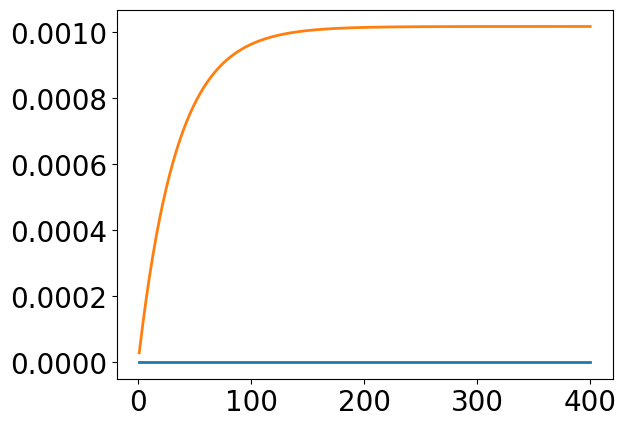

In [656]:
plt.plot(nmeas_l, S_ave_arr[pertb_idx,:])
plt.plot(nmeas_l,fit_exp(nmeas_l,*popt))
# plt.xlim([0,10])

Join data

<ErrorbarContainer object of 3 artists>

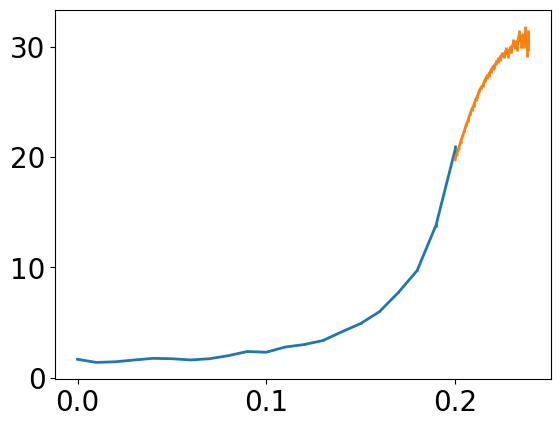

In [258]:
file_idx = 8
file_name = "../data/240405/240405_%d"%(file_idx)
nmeas_l = np.loadtxt(file_name+'_scanx.csv',skiprows=1)
pertb_l = np.loadtxt(file_name+'_scany.csv',skiprows=1)

raw = np.loadtxt(file_name+'_data.csv',skiprows=1,delimiter=',')
S_ave_arr = raw.reshape((len(pertb_l),len(nmeas_l)))

def fit_exp(x,x0,A):
    return A*(1-np.exp(-x/x0))

pertb_upper_idx = 21
meas0_l = np.zeros(pertb_upper_idx)
meas0_std_l = np.zeros(pertb_upper_idx)
for pertb_idx in range(0,pertb_upper_idx,1):
    popt, pcov = curve_fit(fit_exp, nmeas_l, S_ave_arr[pertb_idx,:],p0=(10,np.average(S_ave_arr[pertb_idx,-10:])))
    meas0_l[pertb_idx] = popt[0]
    meas0_std_l[pertb_idx] = np.sqrt(pcov[0,0])

plt.errorbar(pertb_l[0:pertb_upper_idx],meas0_l,yerr=meas0_std_l)

file_idx = 6
file_name = "../data/240405/240405_n%d_pp.npz"%(file_idx)
raw = np.load(file_name)
nmeas_l = raw['x_l']
pertb_l = raw['y_l']
S_ave_arr = raw['data_ave_l'].reshape((len(pertb_l),len(nmeas_l)))

pertb_upper_idx = 40
meas0_l = np.zeros(pertb_upper_idx)
meas0_std_l = np.zeros(pertb_upper_idx)
for pertb_idx in range(0,pertb_upper_idx,1):
    popt, pcov = curve_fit(fit_exp, nmeas_l, S_ave_arr[pertb_idx,:],p0=(10,np.average(S_ave_arr[pertb_idx,-10:])))
    meas0_l[pertb_idx] = popt[0]
    meas0_std_l[pertb_idx] = np.sqrt(pcov[0,0])

plt.errorbar(pertb_l[0:pertb_upper_idx],meas0_l,yerr=meas0_std_l)

compara different system size

Asites=1, Bsites=1000,500,750,1250,1500, p=0.2:0.001:0.15, 6-10n


Asites=1, Bsites=500,750,1000,1250,1500, p=0.0:0.01:0.2, 11-15

Asites=1, Bsites=250, p=0.0:0.01:0.2, 16

Asites=1, Bsites=250, p=0.2:0.002:0.25, 17

Asites=1, Bsites=125, p=0.0:0.002:0.25, 18

Asites=1, Bsites=60, p=0.0:0.002:0.25, 19

Asites=1, Bsites=30, p=0.0:0.002:0.25, 20

/var/folders/d0/tvg6bvm9377bmz53zj2vwnf00000gn/T/ipykernel_39430/187710467.py:2: RuntimeWarning: overflow encountered in exp
  return A*(1-np.exp(-x/x0))


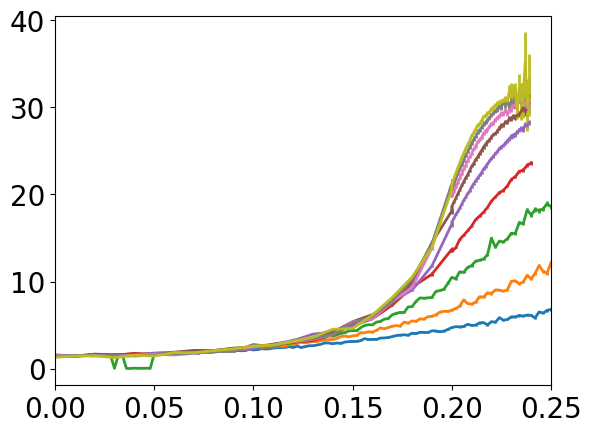

In [381]:
nBsites_l = [125,250,500,750,1000,1250,1500]
fine_file_idx = [7,8,6,9,10]
rough_file_idx = [11,12,13,14,15]
merged_pertb_arr = []
merged_meas0_arr = []
merged_meas0_std_arr = []

for i in [20,19,18]:
    file_name = "../data/240405/240405_%d"%(i)
    nmeas_l = np.loadtxt(file_name+'_scanx.csv',skiprows=1)
    pertb_l = np.loadtxt(file_name+'_scany.csv',skiprows=1)

    raw = np.loadtxt(file_name+'_data.csv',skiprows=1,delimiter=',')
    S_ave_arr = raw.reshape((len(pertb_l),len(nmeas_l)))

    pertb_upper_idx = 126
    meas0_l = np.zeros(pertb_upper_idx)
    meas0_std_l = np.zeros(pertb_upper_idx)
    for pertb_idx in range(0,pertb_upper_idx,1):
        popt, pcov = curve_fit(fit_exp, nmeas_l, S_ave_arr[pertb_idx,:],p0=(10,np.average(S_ave_arr[pertb_idx,-10:])))
        meas0_l[pertb_idx] = popt[0]
        meas0_std_l[pertb_idx] = np.sqrt(pcov[0,0])
    plt.errorbar(pertb_l[0:pertb_upper_idx],meas0_l,yerr=meas0_std_l)
    merged_pertb_arr.append(pertb_l[0:pertb_upper_idx])
    merged_meas0_arr.append(meas0_l)
    merged_meas0_std_arr.append(meas0_std_l)



file_name = "../data/240405/240405_%d"%(16)
nmeas_l = np.loadtxt(file_name+'_scanx.csv',skiprows=1)
pertb_l1 = np.loadtxt(file_name+'_scany.csv',skiprows=1)

raw = np.loadtxt(file_name+'_data.csv',skiprows=1,delimiter=',')
S_ave_arr = raw.reshape((len(pertb_l1),len(nmeas_l)))

pertb_upper_idx1 = 21
meas0_l1 = np.zeros(pertb_upper_idx1)
meas0_std_l1 = np.zeros(pertb_upper_idx1)
for pertb_idx in range(0,pertb_upper_idx1,1):
    popt, pcov = curve_fit(fit_exp, nmeas_l, S_ave_arr[pertb_idx,:],p0=(10,np.average(S_ave_arr[pertb_idx,-10:])))
    meas0_l1[pertb_idx] = popt[0]
    meas0_std_l1[pertb_idx] = np.sqrt(pcov[0,0])

# plt.errorbar(pertb_l1[0:pertb_upper_idx1],meas0_l1,yerr=meas0_std_l1)

file_name = "../data/240405/240405_%d"%(17)
nmeas_l = np.loadtxt(file_name+'_scanx.csv',skiprows=1)
pertb_l2 = np.loadtxt(file_name+'_scany.csv',skiprows=1)

raw = np.loadtxt(file_name+'_data.csv',skiprows=1,delimiter=',')
S_ave_arr = raw.reshape((len(pertb_l2),len(nmeas_l)))

pertb_upper_idx2 = 21
meas0_l2 = np.zeros(pertb_upper_idx2)
meas0_std_l2 = np.zeros(pertb_upper_idx2)
for pertb_idx in range(0,pertb_upper_idx2,1):
    popt, pcov = curve_fit(fit_exp, nmeas_l, S_ave_arr[pertb_idx,:],p0=(10,np.average(S_ave_arr[pertb_idx,-10:])))
    meas0_l2[pertb_idx] = popt[0]
    meas0_std_l2[pertb_idx] = np.sqrt(pcov[0,0])

# plt.errorbar(pertb_l2[0:pertb_upper_idx2],meas0_l2,yerr=meas0_std_l2)
pertb_l = np.concatenate((pertb_l1[0:pertb_upper_idx1],pertb_l2[0:pertb_upper_idx2]))
meas0_l = np.concatenate((meas0_l1,meas0_l2))
meas0_std_l = np.concatenate((meas0_std_l1,meas0_std_l2))
plt.errorbar(pertb_l,meas0_l,yerr=meas0_std_l)
merged_pertb_arr.append(pertb_l)
merged_meas0_arr.append(meas0_l)
merged_meas0_std_arr.append(meas0_std_l)

for i in range(5):
    file_name = "../data/240405/240405_n%d_pp.npz"%(fine_file_idx[i])
    raw = np.load(file_name)
    nmeas_l = raw['x_l']
    pertb_l1 = raw['y_l']
    S_ave_arr = raw['data_ave_l'].reshape((len(pertb_l1),len(nmeas_l)))

    pertb_upper_idx1 = 40
    meas0_l1 = np.zeros(pertb_upper_idx1)
    meas0_std_l1 = np.zeros(pertb_upper_idx1)
    for pertb_idx in range(0,pertb_upper_idx1,1):
        popt, pcov = curve_fit(fit_exp, nmeas_l, S_ave_arr[pertb_idx,:],p0=(10,np.average(S_ave_arr[pertb_idx,-10:])))
        meas0_l1[pertb_idx] = popt[0]
        meas0_std_l1[pertb_idx] = np.sqrt(pcov[0,0])

    # plt.errorbar(pertb_l1[0:pertb_upper_idx1],meas0_l1,yerr=meas0_std_l1)

    file_name = "../data/240405/240405_%d"%(rough_file_idx[i])
    nmeas_l = np.loadtxt(file_name+'_scanx.csv',skiprows=1)
    pertb_l2 = np.loadtxt(file_name+'_scany.csv',skiprows=1)

    raw = np.loadtxt(file_name+'_data.csv',skiprows=1,delimiter=',')
    S_ave_arr = raw.reshape((len(pertb_l2),len(nmeas_l)))

    pertb_upper_idx2 = 21
    meas0_l2 = np.zeros(pertb_upper_idx2)
    meas0_std_l2 = np.zeros(pertb_upper_idx2)
    for pertb_idx in range(0,pertb_upper_idx2,1):
        popt, pcov = curve_fit(fit_exp, nmeas_l, S_ave_arr[pertb_idx,:],p0=(10,np.average(S_ave_arr[pertb_idx,-10:])))
        meas0_l2[pertb_idx] = popt[0]
        meas0_std_l2[pertb_idx] = np.sqrt(pcov[0,0])

    # plt.errorbar(pertb_l2[0:pertb_upper_idx2],meas0_l2,yerr=meas0_std_l2)
    pertb_l = np.concatenate((pertb_l2[0:pertb_upper_idx2],pertb_l1[0:pertb_upper_idx1]))
    meas0_l = np.concatenate((meas0_l2,meas0_l1))
    meas0_std_l = np.concatenate((meas0_std_l2,meas0_std_l1))
    plt.errorbar(pertb_l,meas0_l,yerr=meas0_std_l)
    merged_pertb_arr.append(pertb_l)
    merged_meas0_arr.append(meas0_l)
    merged_meas0_std_arr.append(meas0_std_l)

    plt.xlim([0,0.25])

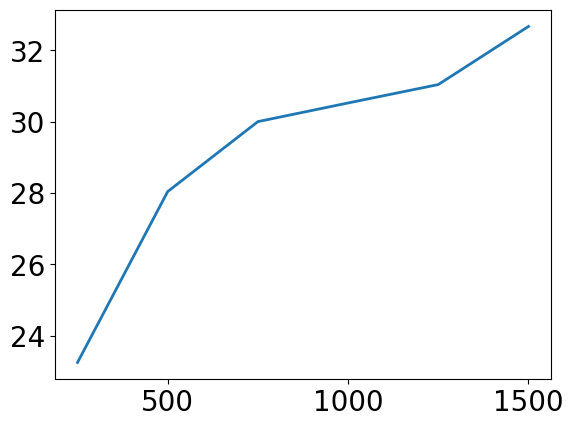

In [326]:
max_nmeas_l = []
for i in range(6):
    max_nmeas_l.append(np.average(merged_meas0_arr[i][-3:]))
plt.plot(nBsites_l,max_nmeas_l)

In [320]:
len(merged_meas0_arr)

6

In [304]:
pertb_l

array([0.2  , 0.201, 0.202, 0.203, 0.204, 0.205, 0.206, 0.207, 0.208,
       0.209, 0.21 , 0.211, 0.212, 0.213, 0.214, 0.215, 0.216, 0.217,
       0.218, 0.219, 0.22 , 0.221, 0.222, 0.223, 0.224, 0.225, 0.226,
       0.227, 0.228, 0.229, 0.23 , 0.231, 0.232, 0.233, 0.234, 0.235,
       0.236, 0.237, 0.238, 0.239, 0.   , 0.01 , 0.02 , 0.03 , 0.04 ,
       0.05 , 0.06 , 0.07 , 0.08 , 0.09 , 0.1  , 0.11 , 0.12 , 0.13 ,
       0.14 , 0.15 , 0.16 , 0.17 , 0.18 , 0.19 , 0.2  ])

check scaling at zero noise

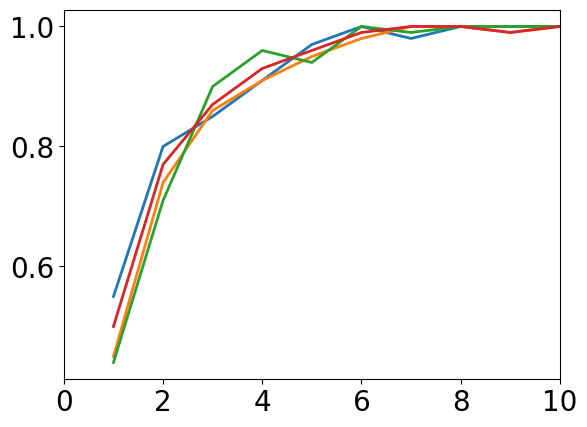

In [284]:
fine_file_idx = [7,8,6,9,10]
rough_file_idx = [11,12,13,14,15]

for i in range(4):
    file_name = "../data/240405/240405_%d"%(rough_file_idx[i])
    nmeas_l = np.loadtxt(file_name+'_scanx.csv',skiprows=1)
    pertb_l = np.loadtxt(file_name+'_scany.csv',skiprows=1)

    raw = np.loadtxt(file_name+'_data.csv',skiprows=1,delimiter=',')
    S_ave_arr = raw.reshape((len(pertb_l),len(nmeas_l)))

    pertb_upper_idx = 1
    meas0_l = np.zeros(pertb_upper_idx)
    meas0_std_l = np.zeros(pertb_upper_idx)
    for pertb_idx in range(0,pertb_upper_idx,1):
        popt, pcov = curve_fit(fit_exp, nmeas_l, S_ave_arr[pertb_idx,:],p0=(10,np.average(S_ave_arr[pertb_idx,-10:])))
        meas0_l[pertb_idx] = popt[0]
        meas0_std_l[pertb_idx] = np.sqrt(pcov[0,0])

    plt.plot(nmeas_l, S_ave_arr[pertb_idx,:])
    # plt.plot(nmeas_l,fit_exp(nmeas_l,*popt))
    plt.xlim([0,10])

    

## Rule 30 MIPT Meas
Asites=1,Bsites=100:100:400,nsteps=Bsites, pertb=0:0.01:0.5, 21-24

Asites=1,Bsites=100:100:400,nsteps=2*Bsites, pertb=0:0.01:0.5, 25-28

Asites=1,Bsites=100:100:200,nsteps=2*Bsites, pertb=0:0.01:0.5, 29-30 measure opposite side

Asites=1,Bsites=100:100:400,nsteps=0.5*Bsites, pertb=0:0.01:0.5, 31-34 measure opposite side

Asites=1:4,Bsites=100,nsteps=0.5*Bsites, pertb=0:0.01:0.5, 35-38 measure opposite side

Asites=1:4,Bsites=100,nsteps=2*Bsites, pertb=0:0.01:0.5, 39-42 measure opposite side

Asites=1:4,Bsites=400,nsteps=2*Bsites, pertb=0:0.01:0.5, 43-45 measure opposite side

Asites=1,Bsites=400,nsteps=200+100*i, pertb=0:0.01:0.5, 47-66 measure opposite side

Asites=1,Bsites=200, nsteps=4*Bsites, pertb=0:0.01:0.3, 70

Asites=1,Bsites=200, nsteps=4*Bsites, pertb=0:0.01:0.3, 71 measure opposite side

Asites=1,Bsites=200, nsteps=0.5*Bsites, pertb=0:0.01:0.3, 72 

Asites=1,Bsites=100:100:400,nsteps=50, pertb=0:0.01:0.5, 73-76

Asites=1,Bsites=100:100:400,nsteps=3.5*nBsites, pertb=0:0.01:0.2, 77-80

Asites=1,Bsites=100:100:400,nsteps=3.5*nBsites, pertb=0.1:0.002:0.3, 81-84

Asites=1,Bsites=100:100:400,nsteps=0.5*nBsites, pertb=0.1:0.002:0.3, 85-88

(25100, 4)


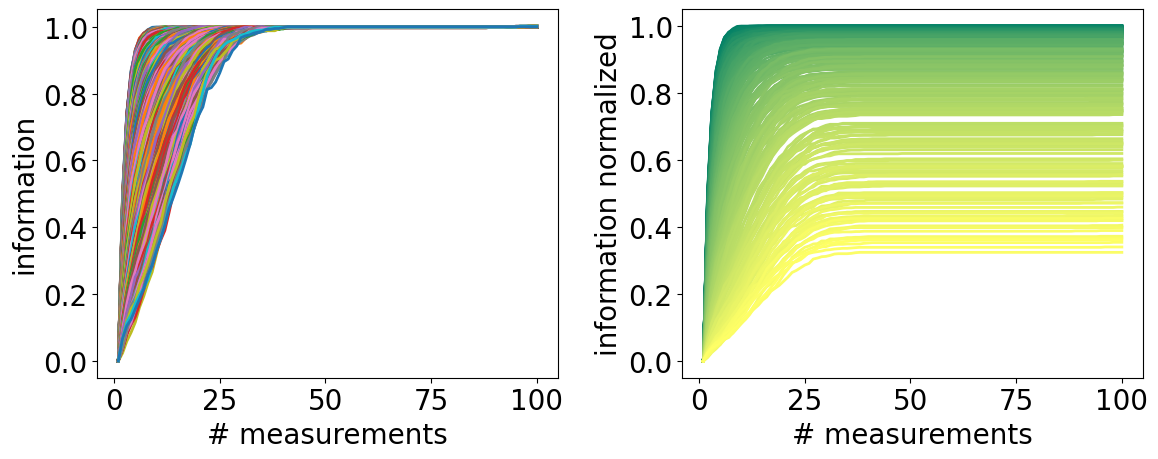

In [15]:
# 0.5 nB
file_idx = 1
# 3.5 nB
# file_idx = 83
file_name = "../data/240405/240405_%d"%(file_idx)
nmeas_l = np.loadtxt(file_name+'_scanx.csv',skiprows=1)
pertb_l = np.loadtxt(file_name+'_scany.csv',skiprows=1)

raw = np.loadtxt(file_name+'_data.csv',skiprows=1,delimiter=',')
print(raw.shape)
S_ave_arr = raw[:,0].reshape((len(pertb_l),len(nmeas_l)))
S_std_arr = raw[:,1].reshape((len(pertb_l),len(nmeas_l)))

plt.figure(figsize=(12,5))
cmap = mpl.colormaps['summer']
plt.subplot(1,2,1)
for pertb_idx in range(0,len(pertb_l),1):
    if np.average(S_ave_arr[pertb_idx,-10:]) == 0:
        print(pertb_l[pertb_idx])
        break
    plt.plot(nmeas_l, S_ave_arr[pertb_idx,:] / np.average(S_ave_arr[pertb_idx,-10:]))
    plt.xlabel("# measurements")
    plt.ylabel("information")

# plt.xlim([0,100])
plt.subplot(1,2,2)
for pertb_idx in range(0,len(pertb_l),1):
    plt.plot(nmeas_l, S_ave_arr[pertb_idx,:],c=cmap((pertb_idx)/len(pertb_l)))
    plt.xlabel("# measurements")
    plt.ylabel("information normalized")

plt.tight_layout()

# plt.xlim([0,100])

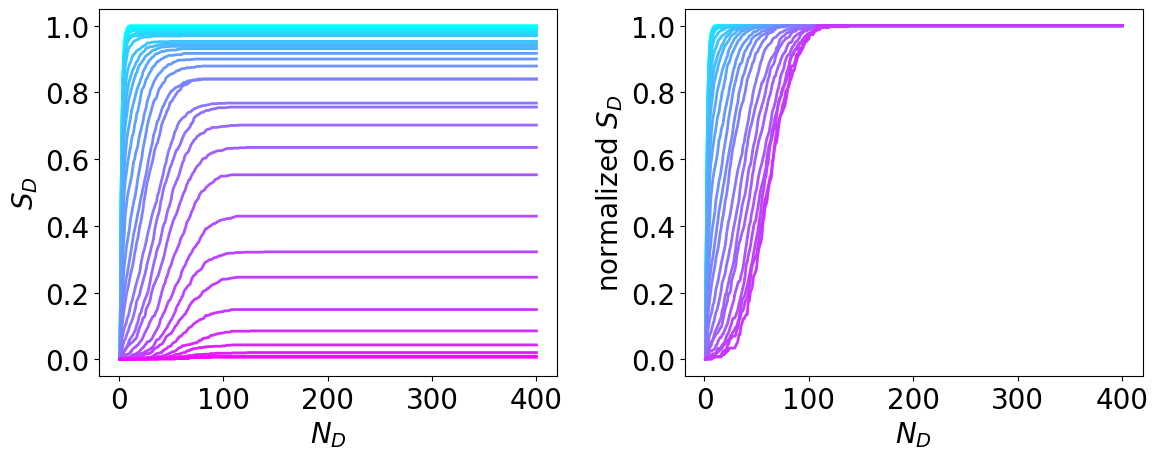

In [782]:
# file_idx = 77
file_idx = 34
file_name = "../data/240405/240405_%d"%(file_idx)
nmeas_l = np.loadtxt(file_name+'_scanx.csv',skiprows=1)
pertb_l = np.loadtxt(file_name+'_scany.csv',skiprows=1)

raw = np.loadtxt(file_name+'_data.csv',skiprows=1,delimiter=',')
S_ave_arr = raw.reshape((len(pertb_l),len(nmeas_l)))

plt.figure(figsize=(12,5))
cmap = mpl.colormaps['cool']

# plt.xlim([0,100])
plt.subplot(1,2,1)
for pertb_idx in range(0,30,1):
    plt.plot(nmeas_l, S_ave_arr[pertb_idx,:],c=cmap((pertb_idx)/30))
    plt.xlabel("$N_D$")
    plt.ylabel("$S_D$")

plt.subplot(1,2,2)
for pertb_idx in range(0,25,1):
    if np.average(S_ave_arr[pertb_idx,-10:]) == 0:
        print(pertb_l[pertb_idx])
        break
    plt.plot(nmeas_l, S_ave_arr[pertb_idx,:] / np.average(S_ave_arr[pertb_idx,-10:]),c=cmap((pertb_idx)/30))
    plt.xlabel("$N_D$")
    plt.ylabel("normalized $S_D$")

plt.tight_layout()

scaling of measurements at 0.5*nBsites

0.43
0.35
0.35
0.31


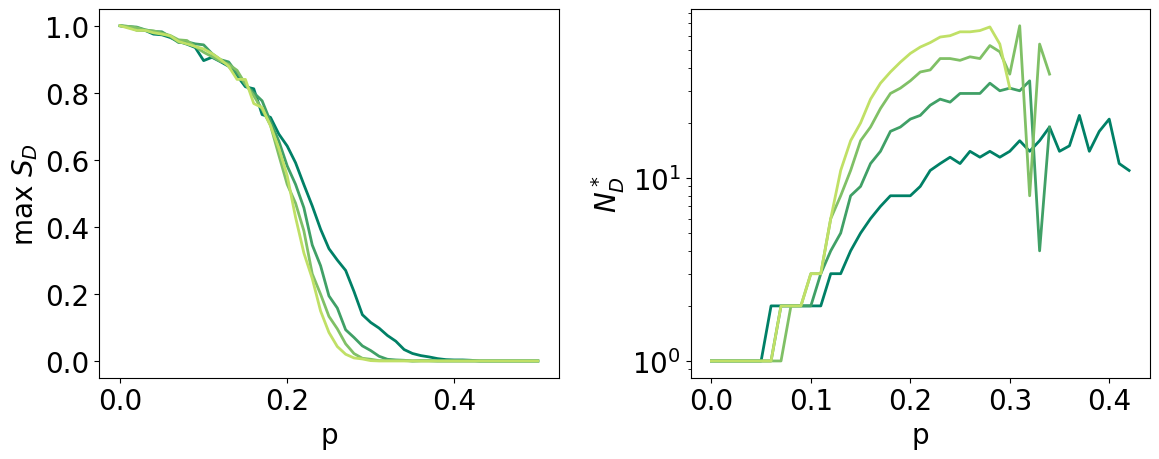

In [14]:
plt.figure(figsize=(12,5))
cmap = mpl.colormaps['summer']
# nsteps=0.5*nBsites
# for file_idx in [31,32,33,34]:
for nB_idx,file_idx in enumerate([31,32,33,34]):
# for nB_idx,file_idx in enumerate([81,82,83,84]):
# for nB_idx,file_idx in enumerate([85,86,87,88]):
# for nB_idx,file_idx in enumerate([73,74,75,76]):
# for file_idx in [73,74,75,76]:
    file_name = "../data/240405/240405_%d"%(file_idx)
    nmeas_l = np.loadtxt(file_name+'_scanx.csv',skiprows=1)
    pertb_l = np.loadtxt(file_name+'_scany.csv',skiprows=1)

    raw = np.loadtxt(file_name+'_data.csv',skiprows=1,delimiter=',')
    S_ave_arr = raw.reshape((len(pertb_l),len(nmeas_l)))

    pertb_upper_idx = len(pertb_l)
    mid_point_l = []
    for pertb_idx in range(0,len(pertb_l),1):
        if np.average(S_ave_arr[pertb_idx,-10:]) == 0:
            pertb_upper_idx = pertb_idx
            print(pertb_l[pertb_idx])
            break
        min_idx = np.argmin(np.abs(S_ave_arr[pertb_idx,:]-0.5*np.average(S_ave_arr[pertb_idx,-10:])))
        mid_point_l.append(min_idx)
    
    mid_point_l = np.array(mid_point_l)
    plt.subplot(1,2,1)
    plt.plot(pertb_l,np.average(S_ave_arr[:,-10:],axis=1),c=cmap(nB_idx/4))
    plt.xlabel("p")
    plt.ylabel("max $S_D$")
    plt.subplot(1,2,2)
    plt.plot(pertb_l[0:pertb_upper_idx],mid_point_l,c=cmap(nB_idx/4))
    # plt.plot(pertb_l[0:pertb_upper_idx],mid_point_l/(100*(nB_idx+1)),c=cmap(nB_idx/4))
    plt.xlabel("p")
    plt.ylabel("$N_D^*$")
    plt.yscale('log')

plt.tight_layout()
    


scaling of measurements at 3.5*nBsites

0.248
0.248
0.238


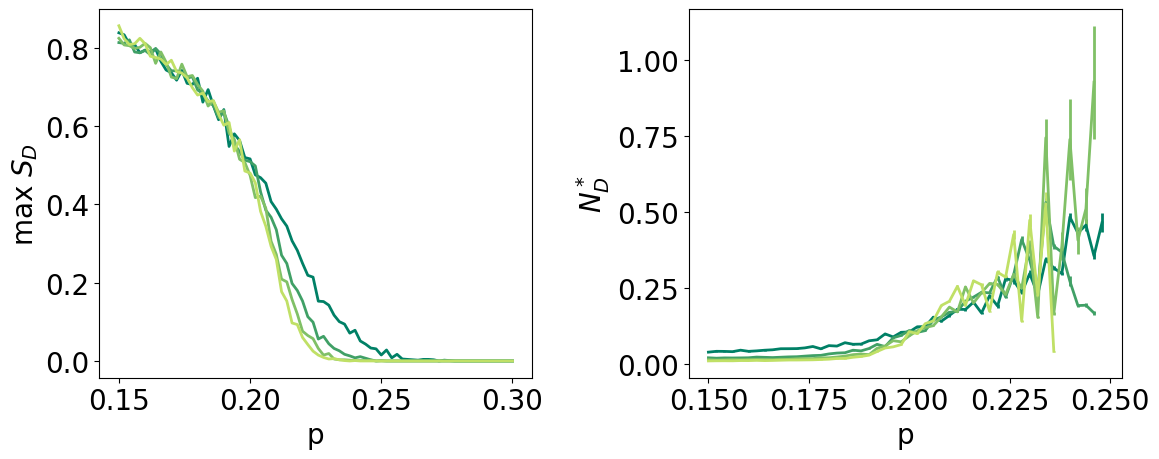

In [784]:
plt.figure(figsize=(12,5))
cmap = mpl.colormaps['summer']
# nsteps=0.5*nBsites
# for file_idx in [77,78,79,80]:
# for nB_idx,file_idx in enumerate([77,78,79,80]):
for nB_idx,file_idx in enumerate([81,82,83,84]):
    file_name = "../data/240405/240405_%d"%(file_idx)
    nmeas_l = np.loadtxt(file_name+'_scanx.csv',skiprows=1)
    pertb_l = np.loadtxt(file_name+'_scany.csv',skiprows=1)

    raw = np.loadtxt(file_name+'_data.csv',skiprows=1,delimiter=',')
    S_ave_arr = raw.reshape((len(pertb_l),len(nmeas_l)))

    def fit_exp(x,x0,A):
        return A*(1-np.exp(-x/x0))

    meas0_l = []
    meas0_std_l = []
    pertb_upper_idx = 50
    for pertb_idx in range(0,pertb_upper_idx ,1):
        if np.average(S_ave_arr[pertb_idx,-10:]) <= 1e-3:
            pertb_upper_idx = pertb_idx
            print(pertb_l[pertb_idx])
            break
        popt, pcov = curve_fit(fit_exp, nmeas_l, S_ave_arr[pertb_idx,:],p0=(10,np.average(S_ave_arr[pertb_idx,-10:])))
        meas0_l.append(popt[0])
        meas0_std_l.append(np.sqrt(pcov[0,0]))
    
    meas0_l = np.array(meas0_l)
    meas0_std_l = np.array(meas0_std_l)
    plt.subplot(1,2,1)
    plt.plot(pertb_l,np.average(S_ave_arr[:,-10:],axis=1),c=cmap(nB_idx/4))
    plt.xlabel("p")
    plt.ylabel("max $S_D$")
    plt.subplot(1,2,2)
    # plt.errorbar(pertb_l[0:pertb_upper_idx],meas0_l,yerr=meas0_std_l)
    plt.errorbar(pertb_l[0:pertb_upper_idx],meas0_l/(100*(nB_idx+1)),yerr=meas0_std_l/(100*(nB_idx+1)),c=cmap(nB_idx/4))
    plt.xlabel("p")
    plt.ylabel("$N_D^*$")
    # plt.xlim([0,0.25])
    # plt.ylim([0,10])
    
plt.tight_layout()

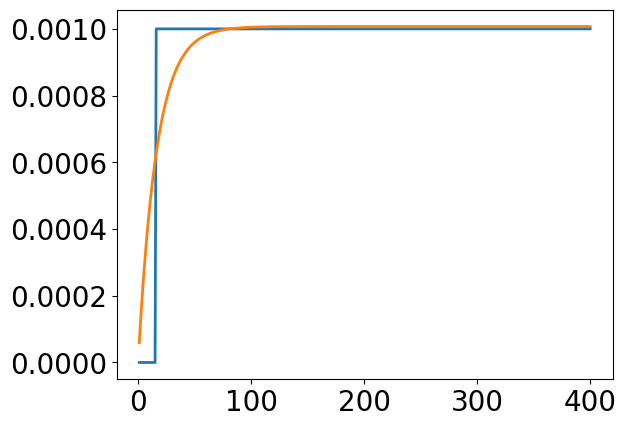

In [727]:
plt.plot(nmeas_l, S_ave_arr[pertb_idx-1,:])
plt.plot(nmeas_l,fit_exp(nmeas_l,*popt))